In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
rewards_dqn_v1 = np.loadtxt('../outputs/dqn-v1-test.txt')
rewards_dqn_v2 = np.loadtxt('../outputs/dqn-v2-test.txt')
rewards_dqn_v3 = np.loadtxt('../outputs/dqn-v3-test.txt')
rewards_dqn_v4 = np.loadtxt('../outputs/dqn-v4-test.txt')
rewards_dqn_v5 = np.loadtxt('../outputs/dqn-v5-test.txt')
reward_dqn_v_1_1 = np.loadtxt('../outputs/dqn-v1-1-test.txt')
reward_dqn_v_1_2 = np.loadtxt('../outputs/dqn-v1-2-test.txt')
reward_dqn_v_1_3 = np.loadtxt('../outputs/dqn-v1-3-test.txt')
reward_dqn_v_1_4 = np.loadtxt('../outputs/dqn-v1-4-test.txt')
reward_dqn_v_2_1 = np.loadtxt('../outputs/dqn-v2-1-test.txt')
reward_dqn_v_2_2 = np.loadtxt('../outputs/dqn-v2-2-test.txt')
reward_dqn_v_2_3 = np.loadtxt('../outputs/dqn-v2-3-test.txt')
reward_dqn_v_2_4 = np.loadtxt('../outputs/dqn-v2-4-test.txt')

rewards_dqn_cnn_v1 = np.loadtxt('../outputs/dqn-cnn-v1.txt')
rewards_random = np.loadtxt('../outputs/random.txt')

In [4]:
def running_average(window_size, data):
    average_data = []
    for ind in range(len(data) - window_size + 1):
        average_data.append(np.mean(data[ind:ind+window_size]))
    for ind in range(window_size - 1):
        average_data.insert(0, np.nan)
    return average_data

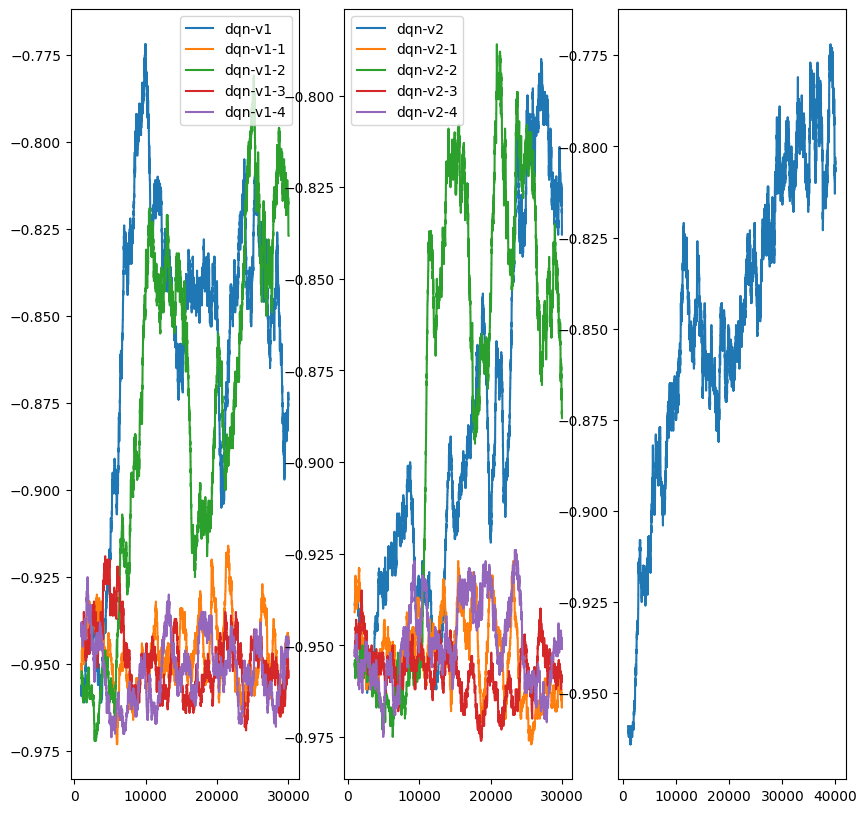

In [17]:
plt.figure(figsize=(10,10))
plt.subplot(131)
plt.plot(running_average(1000,rewards_dqn_v1),label= 'dqn-v1')
plt.plot(running_average(1000,reward_dqn_v_1_1),label= 'dqn-v1-1')
plt.plot(running_average(1000,reward_dqn_v_1_2),label= 'dqn-v1-2')
plt.plot(running_average(1000,reward_dqn_v_1_3),label= 'dqn-v1-3')
plt.plot(running_average(1000,reward_dqn_v_1_4),label= 'dqn-v1-4')
plt.legend()
plt.subplot(132)
plt.plot(running_average(1000,rewards_dqn_v2),label= 'dqn-v2')
plt.plot(running_average(1000,reward_dqn_v_2_1),label= 'dqn-v2-1')
plt.plot(running_average(1000,reward_dqn_v_2_2),label= 'dqn-v2-2')
plt.plot(running_average(1000,reward_dqn_v_2_3),label= 'dqn-v2-3')
plt.plot(running_average(1000,reward_dqn_v_2_4),label= 'dqn-v2-4')
plt.legend()
plt.subplot(133)
plt.plot(running_average(1000,rewards_dqn_cnn_v1), label='dqn-cnn-v1')

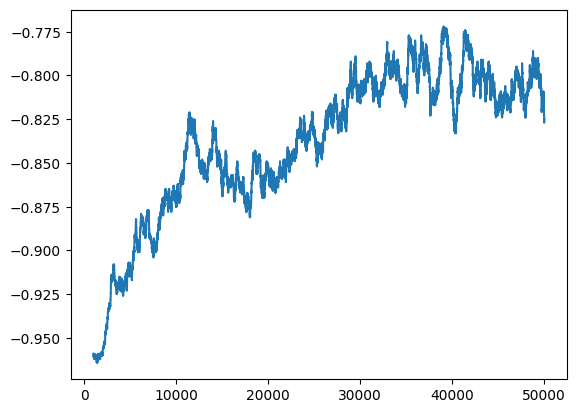

In [20]:
plt.plot(running_average(1000,rewards_dqn_cnn_v1), label='dqn-cnn-v1')

In [68]:
def plot_reward_distribution(data, agent):
    plt.hist(data)
    plt.title(f'Reward distribution for {agent}')

Text(0.5, 0, 'Reward')

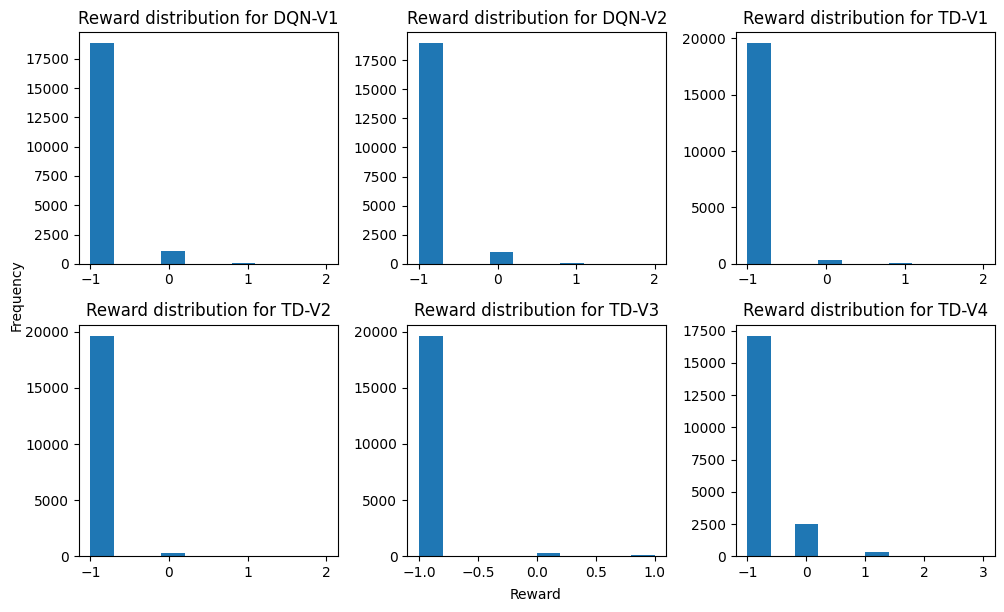

In [90]:
plt.figure(figsize=(10,6))
plt.subplot(2,3,1)
plot_reward_distribution(rewards_dqn_v1, 'DQN-V1')
plt.subplot(2,3,2)
plot_reward_distribution(rewards_dqn_v2, 'DQN-V2')
plt.subplot(2,3,3)
plot_reward_distribution(rewards_td_v1, 'TD-V1')
plt.subplot(2,3,4)
plot_reward_distribution(rewards_td_v2, 'TD-V2')
plt.subplot(2,3,5)
plot_reward_distribution(rewards_td_v3, 'TD-V3')
plt.subplot(2,3,6)
plot_reward_distribution(rewards_td_v4, 'TD-V4')
plt.tight_layout()
plt.figtext(0,0.5, 'Frequency', va='center', rotation='vertical')
plt.figtext(0.5,00, 'Reward', va='center', rotation='horizontal')
